# 1.4 Better Charts with seaborn

The Matplotlib library is definitely the most important Python library to know about when creating graphs. However, it's not always easy to work with. For this reason, an additional library called Seaborn was built that uses Matplotlib on the inside to make graphs even easier to create and manipulate. Seaborn is a *high-level library*, meaning that it is really easy to use but provides few customization options.

To be clear, Matplotlib and Seaborn both have different use cases. For example, Matplotlib is not very good at making bar charts, so we can use Seaborn to get one made. To change the graph's size and output it, however, we will need to use Matplotlib. For this reason, it is best to import and use both libraries at the same time.

In this file, we are going to explore the Seaborn library and some of the graph types that can be made with it.

### About the data

The data used in this notebook shows information about passengers on the *Titanic* cruiseliner, a ship which set out from Southampton, U.K. to sail across the Atlantic ocean and which tragically sank upon collision with an iceberg. The dataset contains information about each passenger's passenger class, name, sex, age, siblings, parents/children, ticket number, ticket fare, cabin number, and the embarked location. It also contains information about each passenger's survival status. This data set is extremely popular among data scientists and will facilitate demonstrations of matplotlib and Pandas concepts.

### Install Seaborn

To install the Seaborn library, run the following code in a Command Prompt window:

```
pip install seaborn
```

### Import Seaborn
Similarly to Pandas and Matplotlib, Seaborn is always imported with an alias. The alias for Seaborn is `sns` by convention.

In [2]:
import seaborn as sns
# !pip install seaborn

Let's also import Pandas and Matplotlib.

⚠ Warning: Remember to upload the Titanic data set to Google Colab before running the cells below.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

Finally, let's import the Titanic data.

In [4]:
df = pd.read_csv(r"C:\Users\Erin.Crump\Documents\Course Dev\All Datasets\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Using Seaborn
Imagine that you want to make a box plot that looks at the spread of `Fare`. With Matplotlib, you can easily create this chart with the `boxplot()` function, passing in the `Fare` column.

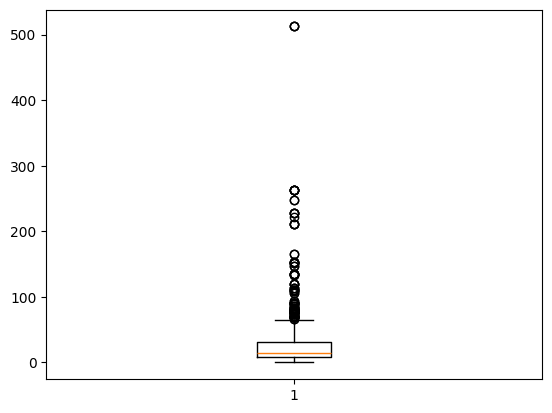

In [5]:
plt.boxplot(df['Fare'])
plt.show()

This chart is fine for a simple box plot. However, what if we wanted to compare the values of `Fare` among each different `Pclass`? This will be difficult to make with Matplotlib.

To achieve such a chart in Matplotlib, we would need to create three separate dataframes, one for each `Pclass`. Then, we can pass the `Fare` column from each one into a list called `pclass_data`, which can then be passed into the `boxplot()` function.

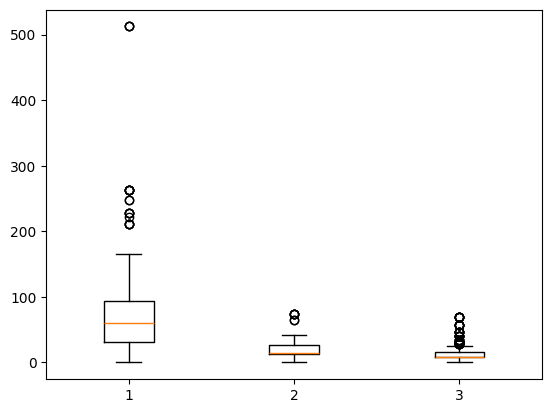

In [6]:
pclass1_df = df[df['Pclass'] == 1]
pclass2_df = df[df['Pclass'] == 2]
pclass3_df = df[df['Pclass'] == 3]

pclass_data = [pclass1_df['Fare'], pclass2_df['Fare'], pclass3_df['Fare']]

plt.boxplot(pclass_data)
plt.show()

That was a lot of work and complexity for a simple box plot.

Seaborn makes this kind of plot much easier. In fact, it allows you to make the same graph in just a single line!

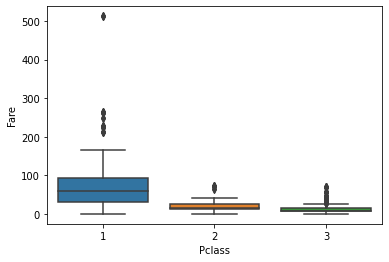

In [ ]:
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.show()


Notice that in the `boxplot()` function above, the parameters `x`, 0`y` were specified. You should always specify each parameter when using Seaborn.

Additionally, notice that we didn't pass in the whole column into the parameters `x` and `y`. Instead, we simply passed in the *column names*, later passing in the entire dataframe to another parameter called `data`.

Also notice that even though we created the graph using Seaborn, we still used `plt.show()` to actually output the graph. This is always done since Seaborn is only used to *create the visualization* and not to output the graph.

Seaborn supports many different plot types. Many of the graphs that seaborn can make can also be made in Matplotlib but are easier to make in Seaborn. Others are only possible to make in Seaborn.

### Types of graphs in Seaborn

#### Box plot

The box plot is used to show a *single column of numerical* data (`x`) in a way that the median of the data set and its outliers are displayed. In Seaborn, an optional column of *categorical data* (`y`) can be passed in as a parameter to create a box plot for each category.

You can create a box plot using the `boxplot()` function with Seaborn.

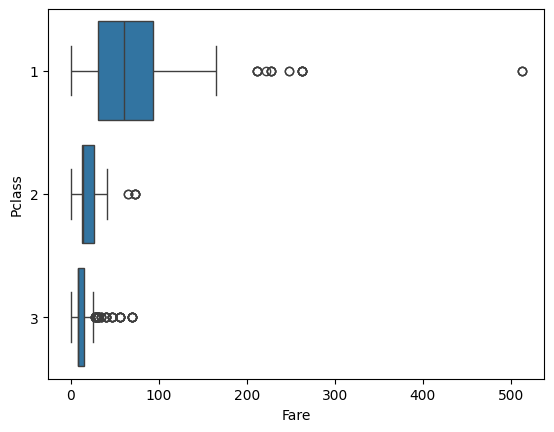

In [8]:
sns.boxplot(x='Fare', y='Pclass', data=df, orient='h')
plt.show()

##### Parameters

| Parameter | Required | Description                                                                                                                                                                                   | Example                                                    |
|-----------|----------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------|
| `x`       | Yes      | A column name representing a numerical column in the data set.                                                                                                                                                                   | `sns.boxplot(x='Pclass', y='Fare', data=df)`                |
| `y`       | No       | A column name representing a categorical column in the data set. Specifying this parameter will create one box plot for each unique value in this column.                                                                        | `sns.boxplot(x='Pclass', y='Fare', data=df)`                |
| `data`    | Yes      | The dataset (a dataframe).                                                                                                                                              |                                             `sns.boxplot(x='Pclass', y='Fare', data=df)`                              |
| `hue`     | No       | A column name representing a categorical column in the data set. Specifying this parameter will color each box according to each unique value in this column. If not the same column as `y`, will split each box into new boxes. | `sns.boxplot(x='Pclass', y='Fare', data=df, hue='Sex')` |
| `orient`  | No       | Determines how the boxes are oriented. Can either be `"v"` for vertical boxes or `"h"` for horizontal boxes.                                                                                  | `sns.boxplot(x='Fare', y='Pclass', data=df, orient='h')`    |
| `color`   | No       | A string indicating the color for all of the boxes.                                                                                                                                           |                       `sns.boxplot(x='Fare', data=df, color='yellow')`                |
| `palette` | No       | A list of colors formatted as strings. There should be enough colors listed for all unique values in the column specified in `hue`. Only works when `hue` is specified. | `sns.boxplot(x='Survived', y='Fare', hue='Survived', data=df, palette=['#FA133D', '#70A6E7'])` |

#### Count plot

The count plot is a special function for making bar charts that visualizes the number of occurences of *categorical data* from a column. It can also be visualized across an additional *categorical column* to show the counts of values across multiple categories.

You can create a count plot in Seaborn using the `countplot()` function.

C:\Users\Erin.Crump\AppData\Local\Temp\ipykernel_33888\369338984.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Pclass', data=df, palette=['red', 'yellow', 'blue'])


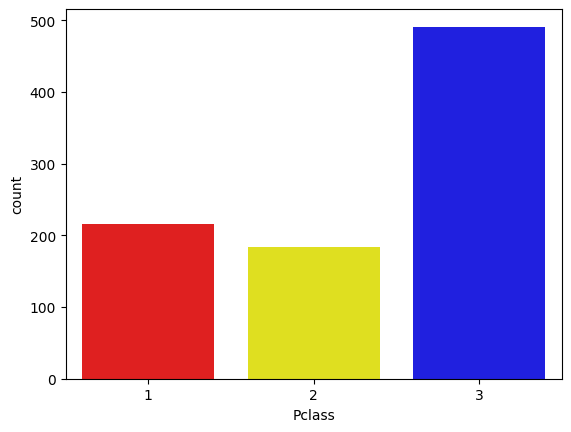

In [12]:
sns.countplot(x='Pclass', data=df, palette=['red', 'yellow', 'blue'])
plt.show()

##### Parameters

| Parameter | Required | Description                                                                                                                                                                                             | Example                                                          |
|-----------|----------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------|
| `x`       | No       | A column of categorical data to be plotted on vertical bars. Cannot be used if `y` is defined.                                                                                                          | `sns.countplot(x='Pclass', data=df)`                                  |
| `y`       | No       | A column of categorical data to be plotted on horizontal bars. Cannot be used if `x` is defined.                                                                                                        | `sns.countplot(y='Pclass', data=df)`                     |
| `data`    | Yes      | The dataset (a dataframe).                                                                                                                                              |                                             `sns.countplot(x='Pclass', data=df)`                              |
| `hue`     | No       | A column of categorical data. Specifying this parameter will color each bar according to each unique value in this column. Will split each bar into new bars, one for each unique value in the column.. | `sns.countplot(x='Pclass', data=df, hue='Survived')` |
| `color`   | No       | A string indicating the color for all of the bars.                                                                                                                                                      | `sns.countplot(x='Pclass', data=df, color='magenta')`                 |
| `palette` | No       | A list of colors formatted as strings. There should be enough colors listed for all unique values in the column specified in `hue`. Only works when `hue` is specified. | `sns.countplot(x='Pclass', data=df, hue='Survived', palette=['#FA133D', '#70A6E7'])` |

#### Line graph

The line graph is used to visualize the relationship between *two numerical columns*. It is usually used to see how the y-axis is affected as the value of the x-axis changes. Thus, it tends to be most useful for graphs involving time or some other consistently incrementing variable. Thus, line graphs are also commonly made with *one date and one numerical column*.

You can create a line graph in Seaborn using the `lineplot()` function.

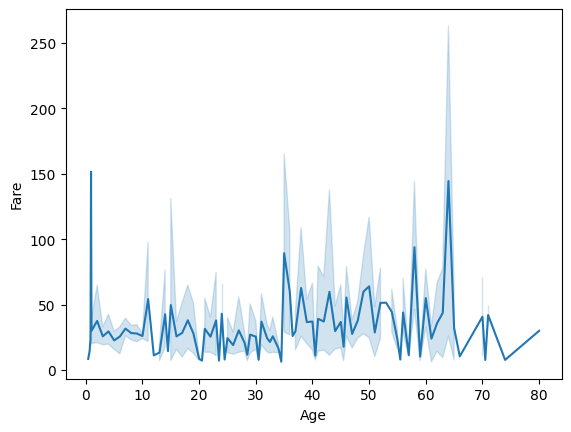

In [13]:
sns.lineplot(x='Age', y='Fare', data=df)
plt.show()

Notice that in the line chart above, the data was automatically aggregated and sorted by Seaborn to produce a normal-looking chart. This is a nice feature, but should not replace your understanding of the need to aggregate and sort data before plotting it on a line chart.

##### Parameters

| Parameter | Required | Description                                                                                                                                                             | Example                                                                                  |
|-----------|----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------|
| `x`       | Yes      | A column of numerical data to be plotted across the x-axis.                                                                                                             | `sns.lineplot(x='Age', y='Fare', data=df)`                                                |
| `y`       | Yes      | A column of numerical data to be plotted across the y-axis.                                                                                                             | `sns.lineplot(x='Age', y='Fare', data=df)`                                                |
| `data`    | Yes      | The dataset (a dataframe).                                                                                                                                              |                                             `sns.lineplot(x='Age', y='Fare', data=df)`                              |
| `hue`     | No       | A column of categorical data. Specifying this parameter will split the line into one new line for each unique value in this column.                                     | `sns.lineplot(x='Age', y='Fare', data=df,  hue='Sex')`                                 |
| `color`   | No       | A string indicating the color for all of the bars.                                                                                                                      | `sns.lineplot(x='Age', y='Fare', data=df,  color='magenta')`                               |
| `palette` | No       | A list of colors formatted as strings. There should be enough colors listed for all unique values in the column specified in `hue`. Only works when `hue` is specified. | `sns.lineplot(x='Age', y='Fare', data=df,  hue='Sex', palette=['#FA133D', '#70A6E7'])` |
| `ci`      | No       | Integer representing the size of the confidence interval to draw when aggregating. Must be between 0 and 100.                                                           | `sns.lineplot(x='Age', y='Fare', data=df,  ci=95)`                                         |
| `sort`    | No       | Boolean indicating whether to automatically sort data before plotting. Default is `True`.                                                                               | `sns.lineplot(x='Age', y='Fare', data=df,  sort=False)`                                    |
| `linestyle` | No       | A formatted string that determines how the line will be drawn. The values that this parameter can take include `"-"` (solid line), `":"` (dotted line), `"--"` (dashed line), `"-."` (dashdot), and `" "` (no line).       | `sns.lineplot(x='Age', y='Fare', data=df, linestyle='-.')` |
| `marker`    | No       | A specific string that determines how each point of the line will be drawn. The parameter can be set to take one of several different string values, including `"o"` (circle), `"*"` (star), `"."` (point), and `"x"` (X). | `sns.lineplot(x='Age', y='Fare', data=df, marker='o')`     |
| `linewidth` | No       | A number indicating how wide to draw the line.                                                                                                                                                                             | `sns.lineplot(x='Age', y='Fare', data=df, linewidth=4)`  |

#### Histogram

The histogram is used to find the frequency of values in a *single numerical column*. Each value is placed into a separate bin and then counted up.

You can create a histogram in Seaborn using the `histplot()` function.

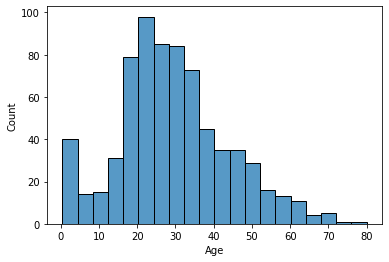

In [ ]:
sns.histplot(x='Age', data=df)
plt.show()

The histogram is extremely powerful in Seaborn. There are many different parameters that can be passed to the `histplot()` function. The most important ones are shown below:

##### Parameters

| Parameter | Required | Description                                                                                                                                | Example                                      |
|-----------|----------|--------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------|
| `x`       | No       | A column of numerical data to be plotted in vertical bins across the x-axis. Cannot be used if `y` is defined.                             | `sns.histplot(x='Age', data=df)`                  |
| `y`       | No       | A column of numerical data to be plotted in horizontal bins across the y-axis. Cannot be used if `x` is defined.                           | `sns.histplot(y='Age', data=df)`                  |
| `data`    | Yes      | The dataset (a dataframe).                                    |                                             `sns.histplot(x='Age', data=df)`                              |
| `hue`     | No       | A column of categorical data. Specifying this parameter will superimpose multiple histograms on top of each other (one for each category). | `sns.histplot(x='Age', data=df, hue='Sex')`   |
| `color`   | No       | A string indicating the color for all of the bins.                                                                                         | `sns.histplot(x='Age', data=df, color='magenta')` |
| `palette` | No       | A list of colors formatted as strings. There should be enough colors listed for all unique values in the column specified in `hue`. Only works when `hue` is specified. | `sns.histplot(x='Age', data=df, hue='Sex', palette=['#FA133D', '#70A6E7'])` |
| `bins`    | No       | An integer representing the number of bins to sort the data into.                                                                          | `sns.histplot(x='Age', data=df, bins=10)`         |
| `kde`     | No       | Boolean indicating whether to plot a density curve on top of the histogram.                                                                | `sns.histplot(x='Age', data=df, kde=True)`        |
| `binrange` | No       | List of two numbers indicating the start and end values for creating the histogram.                                                        | `sns.histplot(x='Age', data=df, binrange=[20, 40])` |

#### Scatter plot

The scatter plot is used to view the relationship between both non-aggregated and aggregated data. It is always created by plotting *two numerical columns* against each other.

You can create a scatter plot in Seaborn using the `scatterplot()` function.

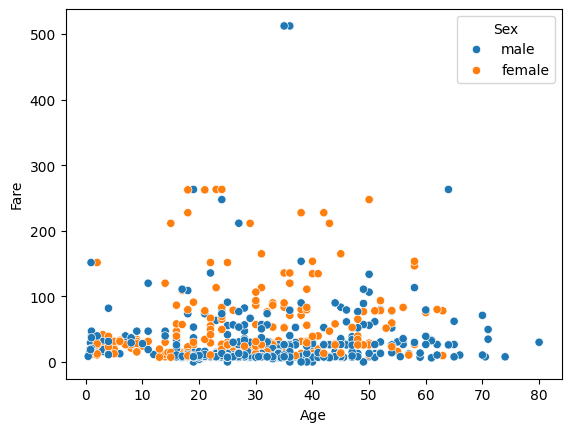

In [16]:
sns.scatterplot(x='Age', y='Fare', data=df, hue='Sex')
plt.show()

##### Parameters

| Parameter | Required | Description                                                                                                                                                             | Example                                                                                     |
|-----------|----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|
| `x`       | Yes      | A column of numerical data containing the location on the x-axis to plot the points.                                                                                    | `sns.scatterplot(x='Age', y='Fare', data=df)`                                                |
| `y`       | Yes      | A column of numerical data containing the location on the y-axis to plot the points.                                                                                    | `sns.scatterplot(x='Age', y='Fare', data=df)`                                                |
| `data`    | Yes      | The dataset (a dataframe).                                                                                                                                              |                                             `sns.scatterplot(x='Age', y='Fare', data=df)`                              |
| `hue`     | No       | A column of categorical data. Specifying this parameter will color each point according to its category as listed in this column.                                       | `sns.scatterplot(x='Age', y='Fare', data=df, hue='Sex')`                                 |
| `size`    | No       | A column of numerical data that determines how big to make each point plotted.                                                                                          | `sns.scatterplot(x='Age', y='Fare', data=df, size='Fare')`                               |
| `palette` | No       | A list of colors formatted as strings. There should be enough colors listed for all unique values in the column specified in `hue`. Only works when `hue` is specified. | `sns.scatterplot(x='Age', y='Fare', data=df, hue='Sex', palette=['#aabbcc', '#11ddaa'])` |
| `style`   | No       | A column of categorical data. Each point will be given a different marker shape depending on its value in this column.                                                  | `sns.scatterplot(x='Age', y='Fare', data=df, style='Survived')`                          |

#### Scatter plot with trend line

Scatter plots are often used with trend lines that show how the relationship between *two numerical variables* changes as a *single categorical variable* changes. In other words, they are used to look at the trend lines among different class variables.

You can create a scatter plot with a linear model line (trend line) by using the `lmplot()` function.

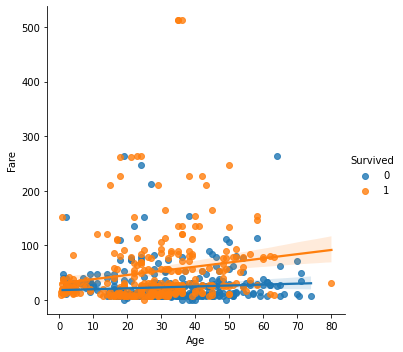

In [ ]:
sns.lmplot(data=df, x='Age', y='Fare', hue='Survived')
plt.show()

##### Parameters

| Parameter | Required | Description                                                                                                                                                             | Example                                                                                     |
|-----------|----------|-------------------------------------------------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------|
| `x`       | Yes      | A column of numerical data containing the location on the x-axis to plot the points.                                                                                    | `sns.lmplot(x='Age', y='Fare', data=df)`                                                |
| `y`       | Yes      | A column of numerical data containing the location on the y-axis to plot the points.                                                                                    | `sns.lmplot(x='Age', y='Fare', data=df)`                                                |
| `data`    | Yes      | The dataset (a dataframe).                                                                                                                                              |                                             `sns.scatterplot(x='Age', y='Fare', data=df)`                              |
| `hue`     | No       | A column of categorical data. Specifying this parameter will color each point according to its category as listed in this column.                                       | `sns.lmplot(x='Age', y='Fare', data=df, hue='Sex')`                                 |
| `palette` | No       | A list of colors formatted as strings. There should be enough colors listed for all unique values in the column specified in `hue`. Only works when `hue` is specified. | `sns.lmplot(x='Age', y='Fare', data=df, hue='Sex', palette=['#aabbcc', '#11ddaa'])` |

#### Bar chart

Bar charts are used to plot the relationship between *one or more numerical variables among one category*. Bar charts are good for visualizing the average `Age` among each `Pclass` of Titanic passengers or the total `Fare` paid by each `Sex`.

You can make a bar chart in Seaborn by using the `barplot()` function.

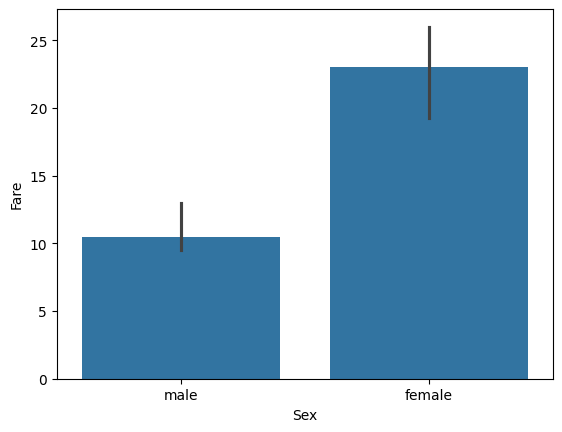

In [24]:
sns.barplot(x='Sex', y='Fare', data=df,  estimator='median')
plt.show()

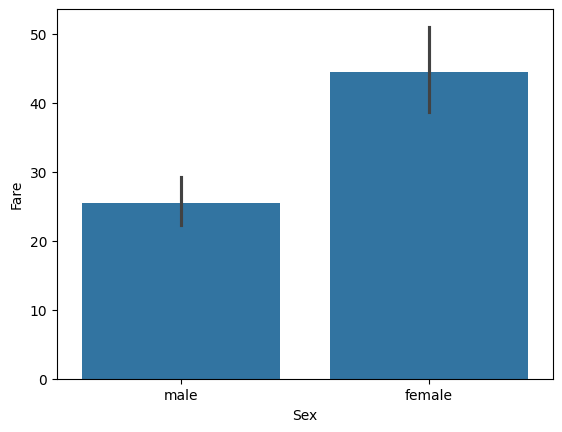

In [25]:
sns.barplot(x='Sex', y='Fare', data=df, estimator='mean')
plt.show()

##### Parameters

| Parameter   | Required | Description                                                                                                                                                                                                                                                                                | Example                                                                              |
|-------------|----------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|--------------------------------------------------------------------------------------|
| `x`         | No       | A column of categorical data.                                                                                                                                                                                                                                                              | `sns.barplot(x='Sex', y='Fare', data=df)`                                            |
| `y`         | Yes      | A column of numerical data.                                                                                                                                                                                                                                                                | `sns.barplot(x='Sex', y='Fare', data=df)`                                            |
| `data`      | Yes      | The dataset (a dataframe).                                                                                                                                                                                                                                                                 | `sns.barplot(x='Sex', y='Fare', data=df)`                                            |
| `hue`       | No       | A column of categorical data. Specifying this parameter will color each point according to its category as listed in this column. This will split each bar previously created into the number of unique values in this column.                                                             | `sns.barplot(x='Sex', y='Fare', data=df, hue='Pclass')`                              |
| `estimator` | No       | An uncalled aggregate function that determines how to aggregate the `y` values to determine the bar heights. Can use uncalled functions like `sum`, `max`, `min`, and `len`, NumPy functions like `np.nunique` and `np.median`, or custom functions. Default is `np.mean` when not specified. | `sns.barplot(x='Sex', y='Fare', data=df, estimator=sum)`                             |
| `palette`   | No       | A list of colors formatted as strings. There should be enough colors listed for all unique values in the column specified in `hue`. Only works when `hue` is specified.                                                                                                                    | `sns.barplot(x='Sex', y='Fare', data=df, hue='Sex', palette=['#ee22cc', '#11ddaa'])` |

For more information about creating graphs with Seaborn, check out the [documentation](http://seaborn.pydata.org/examples/index.html).